## What is EDA (Exploratory Data Analysis)?

**Exploratory data analysis (EDA)** is the process of analyzing data using simple concepts from statistics and probability theory and presenting the results in an easy-to-understand format that supports visuals.

The iris flower dataset (`iris.csv`) consists of 50 samples containing each of the three types of iris flowers: **Iris Setosa**, **Iris Virginica**, and **Iris Versicolor**. The iris flower dataset was introduced by the British statistician and biologist **Ronald Fisher** in his **1936** article "**The use of multiple measures in taxonomic problems**".

Iris data is a **multivariate data set**. The four properties measured from each sample are in centimeters - **sepal length**, **sepal width**, **petal length**, and **petal width**.

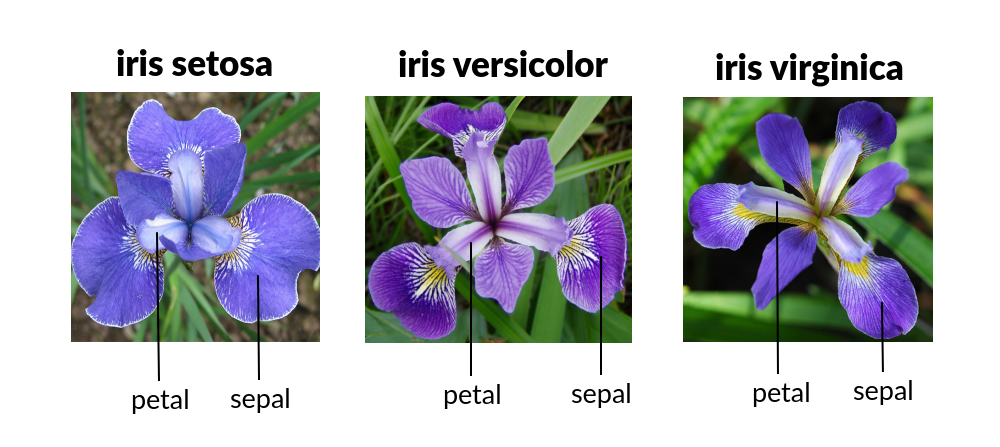

Iris flower data are publicly available. It is one of the most widely used datasets, mostly by newcomers to **Data Scienc**e and **Machine Learning**. This dataset can be downloaded from the archives of the **University of California-Irvine**.

In machine learning terminology, observed features such as sepal length, sepal width, petal length and petal width are called **independent variables**, and the flower class label to be determined (Setosa, Virginica and Versicolor) is called the **dependent variable**.

**The purpose of our use of this data set**; Considering sepal length, sepal width, petal length and petal width, the selected specimen is classified as Setosa, Virginica and Versicolor, one of the three types of iris flower.

Let's install the libraries we will use according to our needs below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Let's load our dataframe from the directory we are in and turn it into a data frame and assign it to the variable df.

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

Let's look at our df.

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Let's visualize the unique values of the target variable "species" of our dataframe.

In [4]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Let's visualize how many unique values the target variable "species" of our dataframe contains.

In [5]:
df["species"].nunique()

3

Let's make it the shape we want.

In [6]:
df["species"] = df["species"].apply(lambda x: 'Setosa' if x == 'Iris-setosa' else x)  
df["species"] = df["species"].apply(lambda x: "Virginica" if  x == "Iris-virginica" else x)
df["species"] = df["species"].apply(lambda x: 'Versicolor' if x == 'Iris-versicolor' else x)

Let's check it out.

In [7]:
df["species"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Let's view the first 5 observations of the data frame.

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Let's see how many features and observations the data frame consists of.

In [9]:
df.shape

(150, 5)

Let's view what type the variables are in the data frame and the memory usage.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's view the **basic statistics values** for numeric variables in the data frame.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


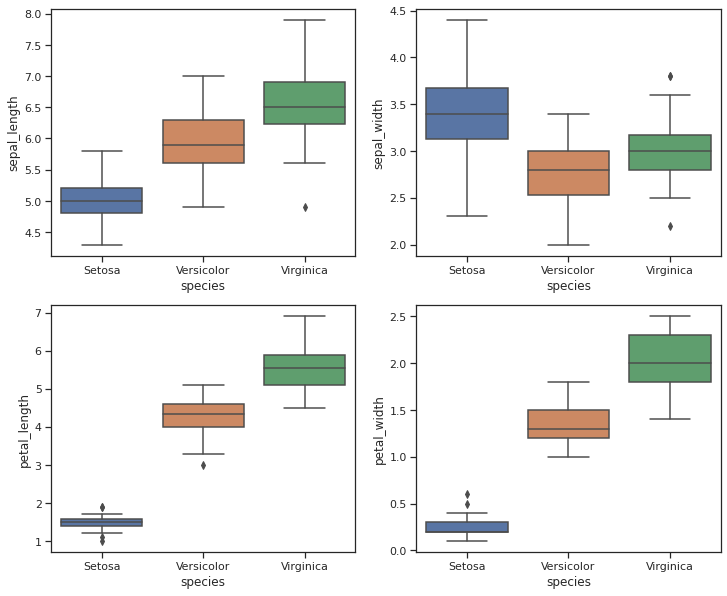

In [12]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=df)
plt.show()

Other statistical values

In [13]:
df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
Setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
Setosa           0.244    0.2  
Versicolor       1.326    1.3  
Virginica        2.026    2.0

Let's observe how many **missing values** in which attribute in the data frame

In [14]:
df.isna().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Let's draw the correlation matrix to show whether there is a correlation between the numerical variables. Let's think about the correlation coefficients.

Which two variables have the strongest positive relationship?

In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Let's draw a heat map to read the correlation coefficients better.

[]

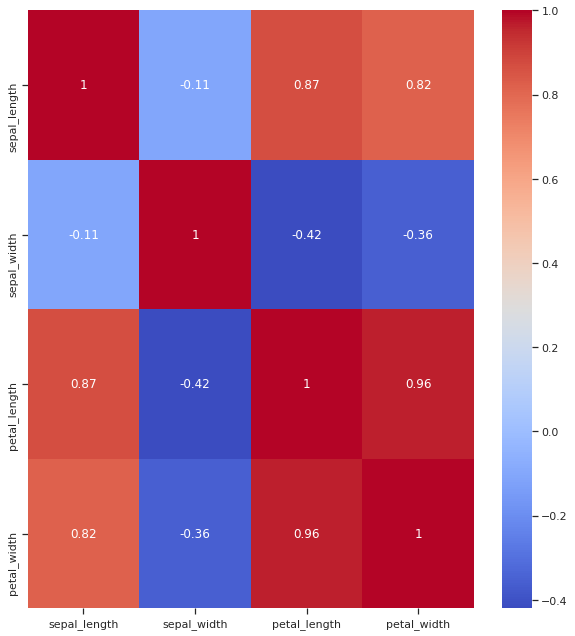

In [16]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")
plt.plot()

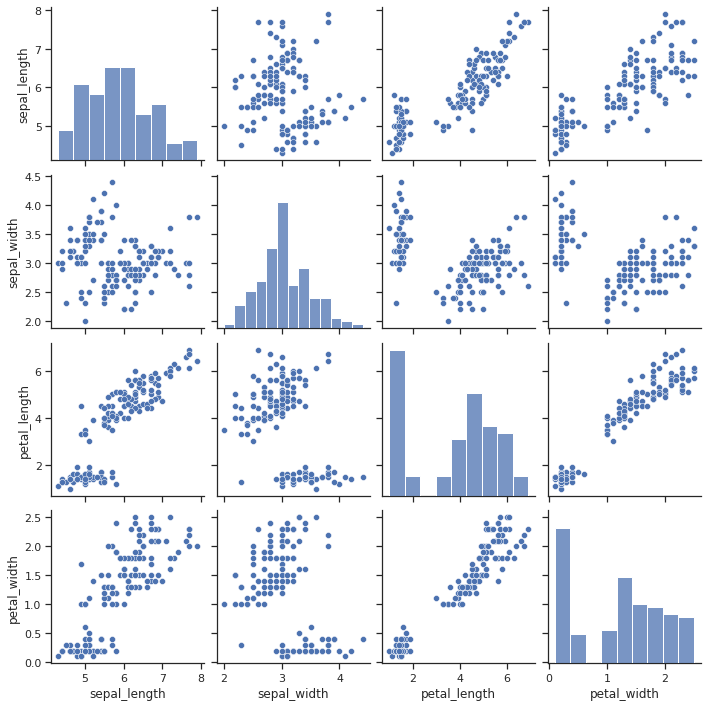

In [17]:
sns.pairplot(df)

We see that the variables sepal.width and sepal.length in the data frame are **continuous**. Let's first use scatterplot to visualize these two continuous data.

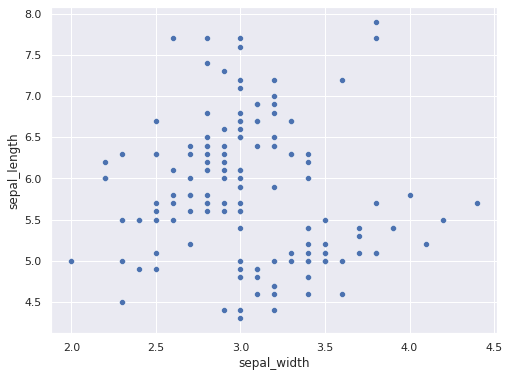

In [18]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x = "sepal_width", y = "sepal_length", data = df);

Let's visualize the same two data using a jointplot to examine their frequencies from a different angle.

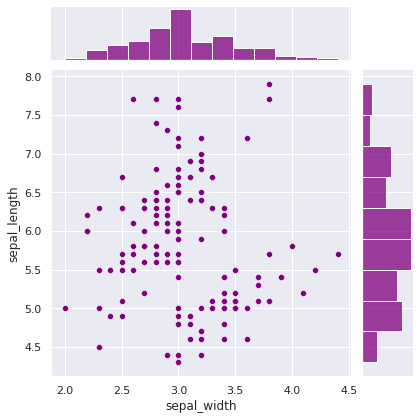

In [19]:
sns.jointplot(x = "sepal_width", y = "sepal_length", data = df, color="purple");

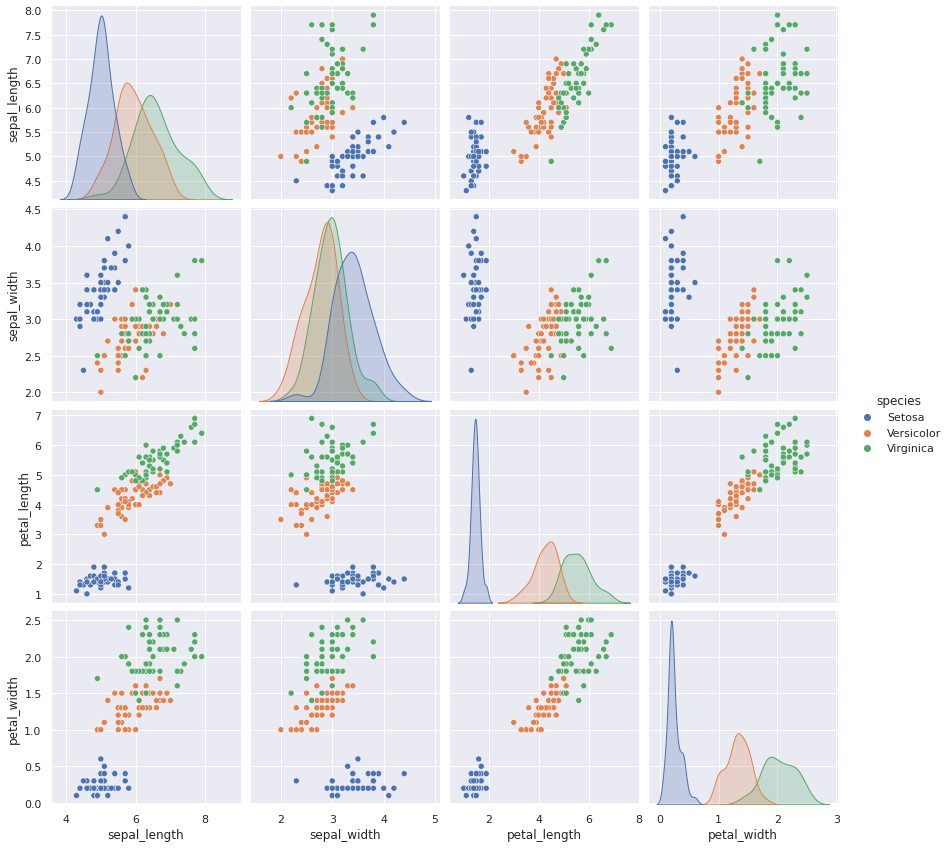

In [20]:
sns.pairplot(df,hue="species",height=3);

Let's visualize the same two data again with scatterplot, but this time break them according to the target variable with the "species" parameter.

Can a clustering be made with sepal variables between 3 different colors? Let's think about how distinct it is.

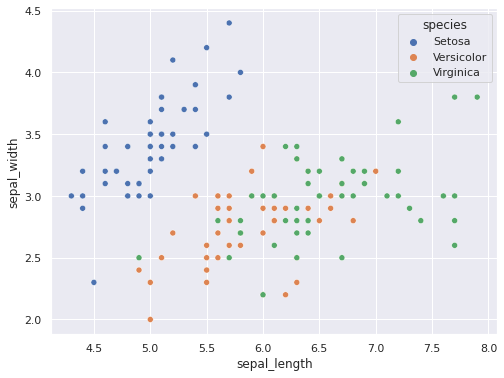

In [21]:
sns.scatterplot(x = "sepal_length", y = "sepal_width", hue = "species",  data = df);

Let's question how balanced our data frame is with the value_counts () function.

In [22]:
df["species"].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: species, dtype: int64

Draw a **violin graph** to examine the distribution of the sepal.width variable.

What does this distribution mean for us, can we say that it is a **normal distribution**?

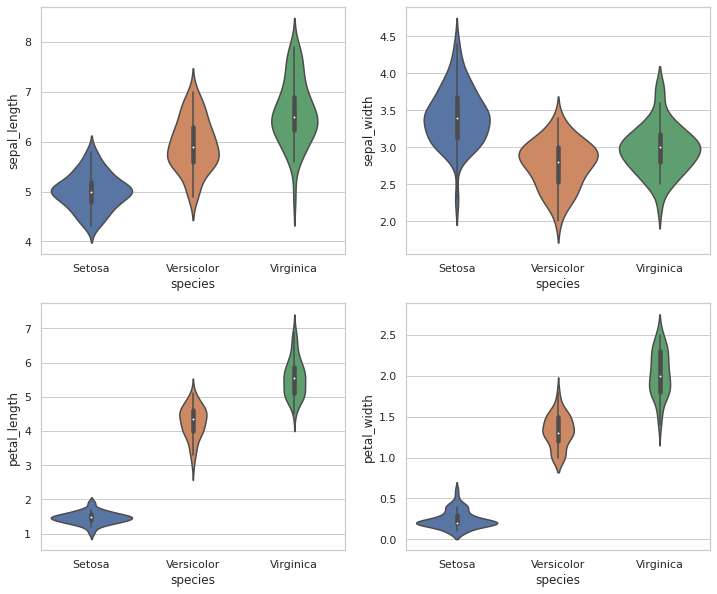

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)
plt.show()

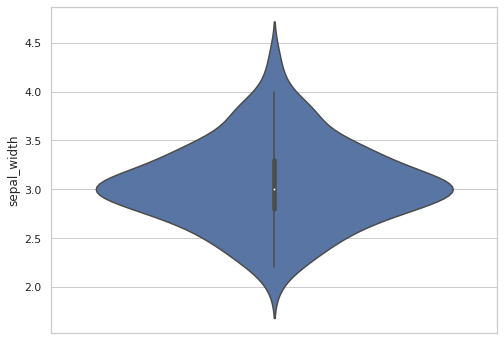

In [24]:
sns.violinplot(y = "sepal_width", data = df );

Let's draw a **distplot** on sepal.width for a better understanding.

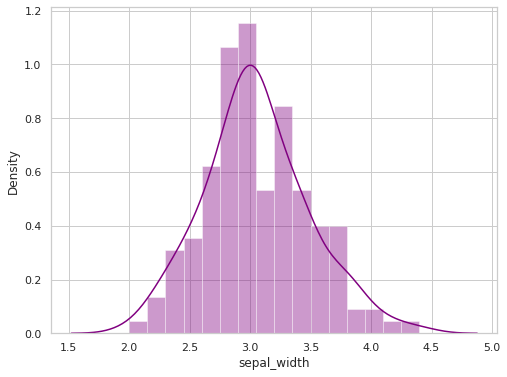

In [25]:
sns.distplot(df["sepal_width"], bins=16, color="purple");

Let's visualize three different violin graphs for the three flower types with a single line over the distribution of the sepal.length variable.

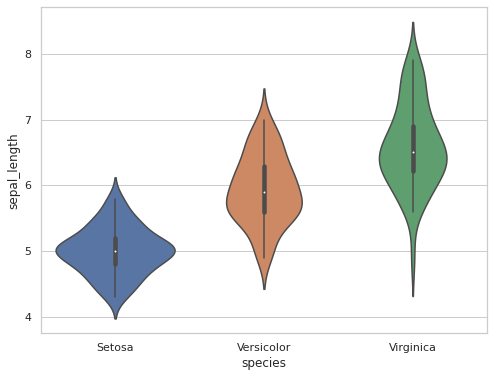

In [26]:
sns.violinplot(x = "species", y = "sepal_length", data = df);

How many observations of which flower type does our data frame contain?

We have already seen with value_counts that it is 50 x 3 and balanced, but to express this visually, give the species parameter to the sns.countplot () function.

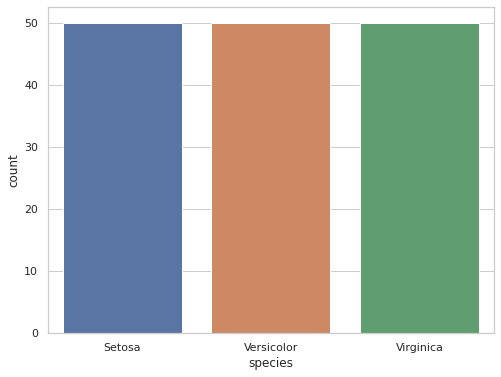

In [27]:
sns.countplot(x = "species", data = df);

Let's visualize the variables sepal.length and sepal.width with sns.jointplot, examine the distribution and the regions where the frequency of the distribution is high.

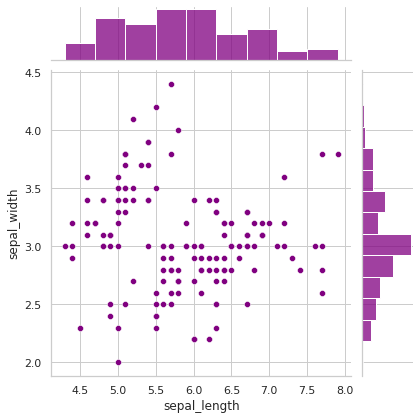

In [28]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data = df, color="purple");

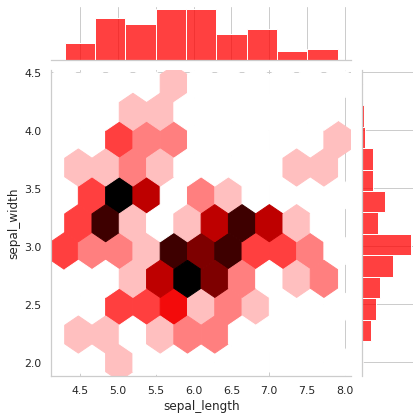

In [29]:
sns.jointplot(x="sepal_length",y="sepal_width",data=df, kind="hex",color="red");

Let's **add the parameter kind = "kde**" to the visualization we made in the previous cell. Thus, we will see that the distribution is transformed from dotted representation to a density-focused visualization.

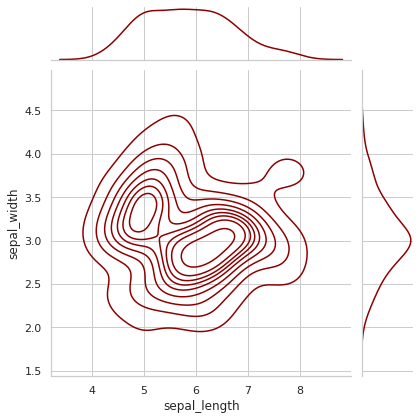

In [30]:
sns.jointplot(x = df["sepal_length"], y = df["sepal_width"], kind = "kde", color = "darkred");

Let's draw the distributions of petal.length and petal.width variables with scatterplot.

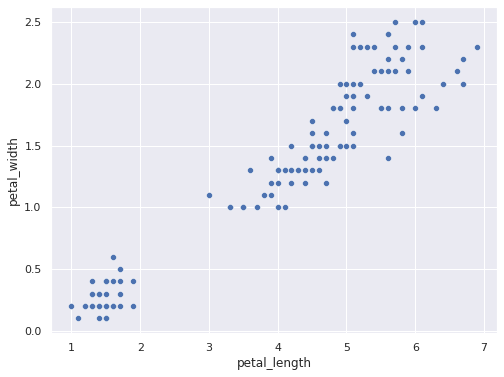

In [31]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x = "petal_length", y = "petal_width", data = df);


Let's give a **3rd** dimension by adding the parameter **hue = "species"** to the same visualization.

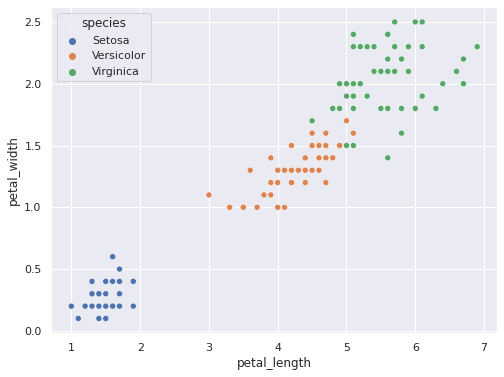

In [32]:
sns.scatterplot(x = "petal_length", y = "petal_width", hue = "species",  data = df);

Let's implement the sns.lmplot () visualization with the variables petal.length and petal.width. What kind of relationship is there between petal length and petal width, and is this relationship strong?

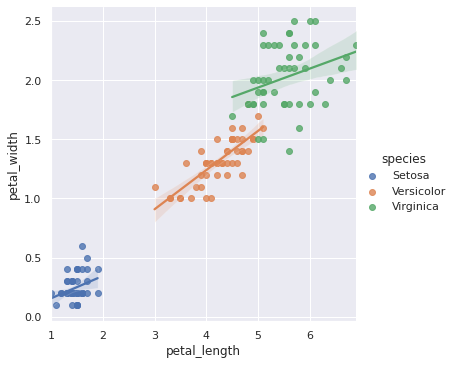

In [33]:
sns.lmplot(x = "petal_length", y = "petal_width", data = df, hue = "species");

To reinforce the answer to this question, let's print the correlation coefficient between the two variables.

In [34]:
df.corr()["petal_length"]["petal_width"]

0.9627570970509662

Let's create a new total length attribute by adding the values ​​of Petal Length and Sepal Length.

In [35]:
df["total_length"] = df["petal_length"] + df["sepal_length"]
df["total_length"]

0       6.5
1       6.3
2       6.0
3       6.1
4       6.4
       ... 
145    11.9
146    11.3
147    11.7
148    11.6
149    11.0
Name: total_length, Length: 150, dtype: float64

Let's print out the average value of total.length.

In [36]:
df["total_length"].mean()

9.602000000000004

Let's print out the standard deviation value of total.length.

In [37]:
df["total_length"].std()

2.5191739884121978

Let's print out the maximum value of sepal.length.

In [38]:
df["sepal_length"].max()

7.9

Let's print out observations with sepal.length greater than **5.5 and setosa** type.

In [39]:
df[(df["sepal_length"] > 5.5) & (df["species"] == "Setosa")]

,sepal_length,sepal_width,petal_length,petal_width,species,total_length
14,5.8,4.0,1.2,0.2,Setosa,7.0
15,5.7,4.4,1.5,0.4,Setosa,7.2
18,5.7,3.8,1.7,0.3,Setosa,7.4


Let's print out **only the sepal.length and sepal.width** variables and values of the observations whose **petal.length is less than 5 and whose type is virginica**.

In [40]:
df.iloc[:,0:2][(df["petal_length"] < 5) & (df["species"] == "Virginica")]

,sepal_length,sepal_width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


In [41]:
df[(df['species']=='Virginica') & (df['petal_length']<5)][["sepal_length", "sepal_width"]]

,sepal_length,sepal_width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Let's do a grouping according to our target variable, species, and view the average of our variable values.

In [42]:
df.groupby(["species"]).mean()

,sepal_length,sepal_width,petal_length,petal_width,total_length
species,,,,,
Setosa,5.006,3.418,1.464,0.244,6.470
Versicolor,5.936,2.770,4.260,1.326,10.196
Virginica,6.588,2.974,5.552,2.026,12.140


Let's just print the standard deviation values of our petal.length variable by grouping according to our target variable species.

In [43]:
df.groupby(["species"]).std()["petal_length"]

species
Setosa        0.173511
Versicolor    0.469911
Virginica     0.551895
Name: petal_length, dtype: float64

Observations:

* The dataset is balanced, meaning there are equal records for all three species.

* While we have columns with four numerical data, we only have one categorical column (flower types) which is the data we aim to analyze.

* There is a strong correlation between petal width and petal length.

* Setosa species,Due to its small size, it is the most easily distinguished type.

* Versicolor and Virginica strains are often mixed and sometimes difficult to separate. Generally, however, Versicolor strain sizes are more average. In contrast, virginica species are larger in size.

Thank you for your time and attention.